# `simpl_eeg` package
<br>

## Introduction

Electroencephalograms (EEG) is an electrophysiological measurement method used to examine the electrical activity of the brain and represent it as location-based channels of waves and frequencies. EEG benefits from being inexpensive and unobtrusive, leading to its widespread use in diagnosing brain disorders such as epilepsy and brain damage from head injuries. EEG data is recorded with high dimensionality, so the use of visualizations and metrics is essential for the data to be easily interpreted by humans. Currently, the options for visualizing EEG data require the use of complicated packages or software and the functionally is often limited.

`simpl_eeg` package is developed by students from the Master of Data Science program of University of British Columbia to provide the ability to conveniently produce advanced visualizations and metrics for specified time ranges of EEG data.
<br>

## Instructions

### Installation

Run the following commands in your terminal to clone the repository and install the package:

```bash
git clone https://github.com/UBC-MDS/simpl_eeg_capstone.git
cd simpl_eeg_capstone
pip install -e .
```
<br>

### Import

There are six modules in this package. Each of them contains functions for different visualizations. The `eeg_objects` module contains functions to convert the raw data into epoched data with specified time ranges.

In [2]:
from simpl_eeg import raw_voltage, eeg_objects, connectivity, topomap_2d, topomap_3d_brain, topomap_3d_head

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Please include the line below in your IDE so that the changes would be simultaneously reflected when you make a change to the python scripts.**

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

<br>

### Define parameters

There are some common parameters for all functions in this package, it would be more convenient to define all parameters before going into each functions.

In [8]:
# change None to values of interest

experiment = "927" # has to be a string
nth_epoch = 0
# color_min = None
# color_max = None
# colormap = None

<br>

### Create epoched data

In [24]:
raw = eeg_objects.Epochs(experiment)

Reading C:\Users\Yiki\Documents\UBC\MDS\Homework\capstone\simpl_eeg_capstone\simpl_instructions\data\927\fixica.fdt
Not setting metadata
Not setting metadata
33 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 2049 original time points ...
0 bad epochs dropped


In [25]:
raw.set_nth_epoch(nth_epoch)

In [26]:
epoch = raw.get_nth_epoch()

<br>

### Create the raw voltage plot

#### To generate the plot

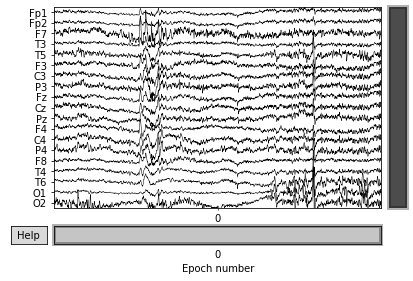

In [21]:
voltage_plot = raw_voltage.plot_voltage(epoch)
voltage_plot;

#### To save the plot

In [ ]:
# You could change the plot to different formats by changing the format argument in the function. 
# It supports 'png', 'pdf', 'svg'.

voltage_plot.savefig("voltage_plot.svg", format= 'svg')

<br>

### Create the connectivity plot

#### To generate the animtation

In [ ]:
%matplotlib inline

In [ ]:
conn_plot_animated = connectivity.animate_connectivity(epoch, calc_type="correlation", colormap='turbo')

In [ ]:
from IPython.display import HTML

HTML(conn_plot_animated.to_jshtml())

#### To save the animattion

##### To save the animated plot as gif

In [ ]:
from matplotlib.animation import PillowWriter
writergif = PillowWriter(fps=30)
conn_plot_animated.save("connectivity.gif", writer=writergif)

##### To save the animated plot as mp4

In [ ]:
from matplotlib.animation import FFMpegWriter
writervideo = FFMpegWriter(fps=60) 
conn_plot_animated.save("connectivity.mp4", writer=writervideo) # just change the file name to avi if you want the avi file

<br>

### Create the 2D topographic map

#### To generate the animation

In [ ]:
topo_2d = topomap_2d.animate_topomap_2d(epoch)

In [ ]:
from IPython.display import HTML

HTML(topo_2d.to_jshtml())

#### To save the animation

##### To save the animation as gif

In [ ]:
from matplotlib.animation import PillowWriter
writergif = PillowWriter(fps=30)
topo_2d.save("topo_2d.gif", writer=writergif)

##### To save the animation as mp4

In [ ]:
from matplotlib.animation import FFMpegWriter
writervideo = FFMpegWriter(fps=60) 
topo_2d.save("topo_2d.mp4", writer=writervideo) 

<br>

### Create the topographic map in 3D brain

```{note}
* NOTE: Before an animation or plot can be generated a "forward" and "inverse" (abbreviated as "stc") must first be generated. If they are not provided to either of the plotting animations they will be automatically generated HOWEVER this will increase the time it takes to generate the figure.

- The forward/inverse are used to retrieve a brain model to attach the EEG data to and to do some of the mapping calculations. The forward downloads 'fsaverage' MRI data which represents a brain averaged out from dozens of different patients.
```

#### Generate Forward

In [28]:
fwd = topomap_3d_brain.create_fsaverage_forward(epoch)

0 files missing from root.txt in C:\Users\Yiki\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage
Source space          : C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif
MRI -> head transform : C:\Users\Yiki\miniconda3\envs\capstone\lib\site-packages\mne\data\fsaverage\fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.00000

#### Generate Inverse

In [29]:
stc = topomap_3d_brain.create_inverse_solution(epoch, fwd)

Computing rank from data with rank=None
    Using tolerance 1.8e-11 (2.2e-16 eps * 19 dim * 4.3e+03  max singular value)
    Estimated rank (eeg): 19
    EEG: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using SHRUNK
Done.
Using cross-validation to select the best estimator.
Number of samples used : 2049
log-likelihood on unseen data (descending order):
   shrunk: -66.294
   empirical: -187.228
selecting best estimator: shrunk
[done]
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 19 channels.
    19 out of 19 channels remain after picking
Selected 19 channels
Creating the depth weighting matrix...
    19 EEG channels
    limit = 20485/20484 = 9.5

#### To generate figure with pyvista backend

In [30]:
pyvista_brain_fig = topomap_3d_brain.plot_topomap_3d_brain(epoch, stc = stc, backend = 'pyvista')

Using pyvista 3d backend.

Using control points [1.28643063 1.44557256 3.12872612]


#### To save animation with pyvista backend

In [34]:
topomap_3d_brain.save_animated_topomap_3d_brain(pyvista_brain_fig, filename = "brain_animation.gif")

TypeError: 'NoneType' object is not subscriptable

#### To generate figure with matplotlib backend (recommended)

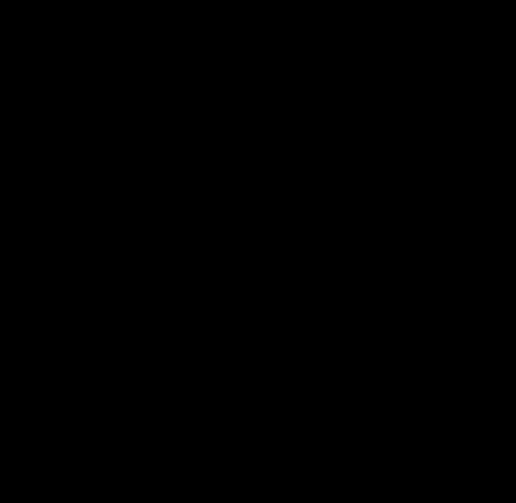

<Figure size 216x216 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


<Figure size 216x216 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


<Figure size 216x216 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


<Figure size 216x216 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


<Figure size 216x216 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


<Figure size 216x216 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


<Figure size 421.2x421.2 with 0 Axes>

Using control points [1.28643063 1.44557256 3.12872612]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Yiki\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
    3 smooth iterations done.


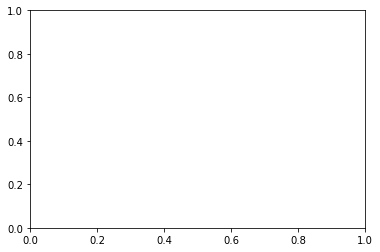

In [36]:
matplot_brain_fig = topomap_3d_brain.plot_topomap_3d_brain(epoch, stc = stc, backend = 'matplotlib')

#### To generate animation with matplotlib backend (slow but recommended)

In [37]:
matplotlib_animation = topomap_3d_brain.animate_matplot_brain(matplotlib, stc = stc, views = 'lat', hemi = 'lh')

NameError: name 'matplotlib' is not defined

<br>

### Create the topographic map in 3D head shape

#### To generate the plot for a specific time stamp

In [ ]:
timestamp = -300 # you can change the value to the time stamp of your interest
topo_3d__head_static = topomap_3d_head.topo_3d_map(epoch, timestamp)

In [ ]:
topo_3d__head_static.show()

#### To generate the animnation

In [ ]:
topo_3d_head = topomap_3d_head.animate_3d_head(epoch)

In [ ]:
topo_3d_head.show()

#### To save the animnation

##### To save the static plot

In [ ]:
topo_3d__head_static.write_image("topo_3d_static.svg", engine="kaleido") 

In [ ]:
topo_3d__head_static.write_image("topo_3d_static.png") # no need to specify engine if not saved as svg file

##### To save the animnation as html

In [ ]:
topo_3d_head.write_html("topo_3d.html")

##### To save the animation as gif file

You would need specify the starting timestamp, ending timestamp and the duration between frames

In [ ]:
topomap_3d_head.save_gif(epoch, starting=-300, ending=-290, gifname="example", duration=200)

##### To save the animation as mp4 file

You would need to save it as gif file first and then convert it into mp4 file.

In [ ]:
import moviepy.editor as mp

topomap_3d_head.save_gif(epoch, starting=-300, ending=-290, gifname="example", duration=100)
clip = mp.VideoFileClip("example.gif")
clip.write_videofile("example.mp4")